In [1]:
import numpy as np
import os
import pickle as p
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
path_1 = "/home/rohit/PhD_Work/GM_my_version/Graph_matching/data/simu_graph/"
folder = "/0/graphs/"
#path = "/home/rohit/PhD_Work/stage_nathan/data/simu_graph/noise_50,outliers_20/0/graphs/"
#directory = os.listdir("/home/rohit/PhD_Work/stage_nathan/data/simu_graph/noise_50,outliers_20/0/graphs")

In [3]:
def mean_edge_len(G):
    
    all_geo = [z['geodesic_distance'] for x,y,z in list(G.edges.data())]
    mean_geo = np.array(all_geo).mean()
    std = np.std(all_geo)
    
    return mean_geo,std,all_geo

In [7]:
def mean_edge_len_vs_noise(path):
    data_folder = [name for name in os.listdir(path)] # list the folders containing all graphs
    
    mean_geo = []
    noise_params = []
    mean_std = []
    all_geo_arr = []
    
    for dr in data_folder: 
        geo_dis = []
        std_dist = []
        geo_dist_arr = []
        for graph in os.listdir(path+"/"+dr+folder):
            
            
            G = p.load(open(path+"/"+dr+folder+"/"+graph, "rb" )) #read the graphs
            
            dist,std,all_geo = mean_edge_len(G)
            geo_dis.append(dist) # mean geodesic distance of graph samples per parameters
            std_dist.append(std) # standard deviation of graph samples per parameters
            geo_dist_arr.append(np.array(all_geo))
                
        all_geo_arr.append(np.mean(np.array(geo_dist_arr),0))
        mean_geo.append(np.mean(geo_dis)) # mean of mean geodesic distance
        mean_std.append(np.mean(std_dist)) # mean standard deviation
        
        split_str = dr.split('_') # split folder name to extract noise param
        noise_params.append(int(split_str[1].split(',')[0]))
        
        
    return mean_geo,noise_params,mean_std,all_geo_arr

In [8]:
mean_geo,noise_params,mean_std,all_geo_arr = mean_edge_len_vs_noise(path_1)

In [9]:
data_is = {'noise_params':noise_params,'mean_geo':mean_geo,'mean_std':mean_std}
df = pd.DataFrame(data_is, columns=['noise_params','mean_geo','mean_std'])

In [10]:
df = df.sort_values(by=['noise_params'])

In [11]:
noise_params = df['noise_params'].values.tolist()
mean_geo = df['mean_geo'].values.tolist()
mean_std = df['mean_std'].values.tolist()

Text(0, 0.5, 'Mean edge length')

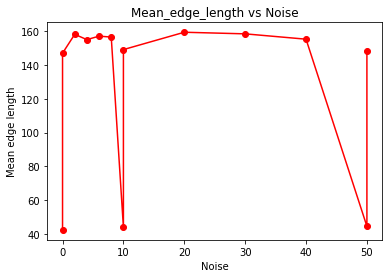

In [12]:
plt.plot(noise_params,mean_geo,'-o',c='red')
plt.title("Mean_edge_length vs Noise")
plt.xlabel('Noise')
plt.ylabel('Mean edge length')

Text(0, 0.5, 'Mean edge length')

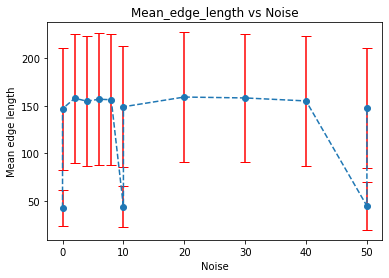

In [13]:
plt.errorbar(noise_params,mean_geo,mean_std, linestyle='--', marker='o',ecolor='r',capsize=5)
plt.title("Mean_edge_length vs Noise")
plt.xlabel('Noise')
plt.ylabel('Mean edge length')

In [12]:
#sns.distplot(all_geo_arr, hist = False, kde = True,kde_kws = {'shade': True, 'linewidth': 3})

Text(0, 0.5, 'Density')

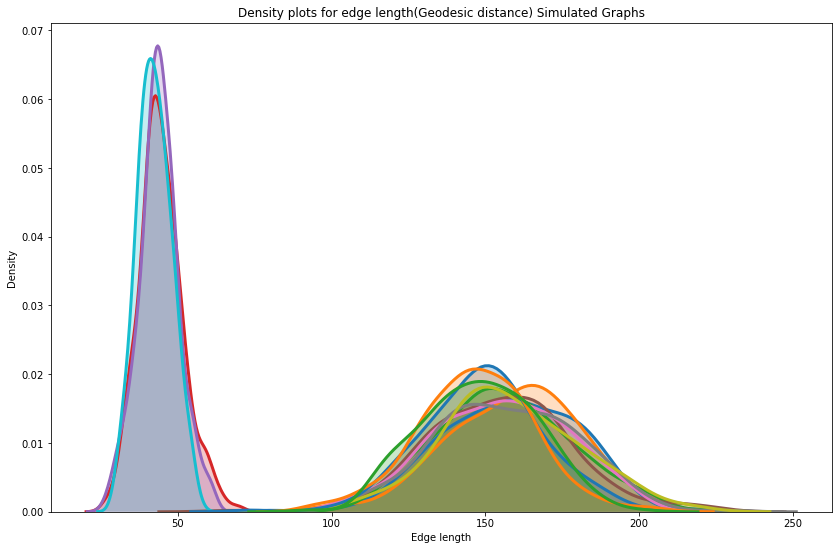

In [14]:
plt.figure(figsize=(14,9))
for arr in all_geo_arr:
    sns.distplot(arr, hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
plt.title("Density plots for edge length(Geodesic distance) Simulated Graphs")
plt.xlabel('Edge length')
plt.ylabel('Density')

Text(0, 0.5, 'Density')

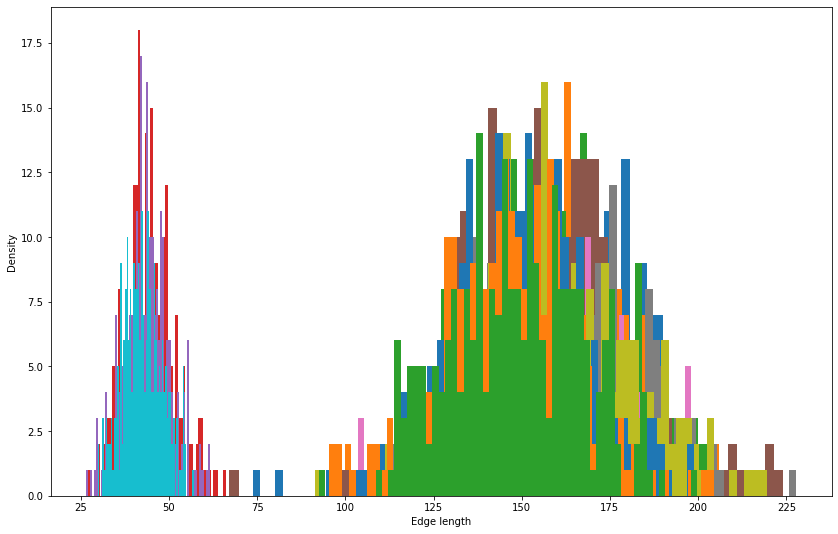

In [15]:
plt.figure(figsize=(14,9))
for arr in all_geo_arr:
    plt.hist(arr, bins = 60)
plt.xlabel('Edge length')
plt.ylabel('Density')

In [14]:
#a.append(a)